# Exercise multi-class classification

In this exercise you are going to download the [Fashion MNIST built-in](https://github.com/zalandoresearch/fashion-mnist) dataset directly via TensorFlow. You can import it using the [`tf.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) module.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

2025-03-31 14:06:08.287110: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-31 14:06:08.287193: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-31 14:06:08.288033: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-31 14:06:08.294293: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Check the shapes of the data.

In [2]:
# Check the shape of your data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
# Look at the shape of a single example
train_data[0].shape

(28, 28)

You should have discovered 60,000 training examples each with shape (28, 28) and a label each as well as 10,000 test examples of shape (28, 28).

Now, plot some random images from the dataset.

(<matplotlib.image.AxesImage at 0x7f4027d91e40>, 38346)

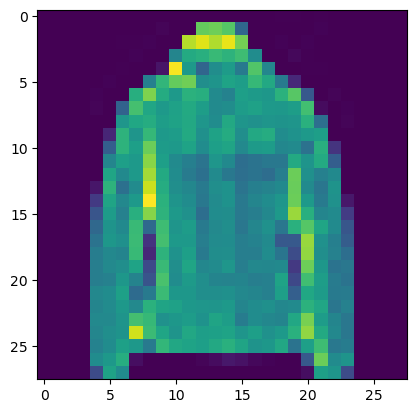

In [4]:
# Plot a random example
random_image_number = np.random.randint(0, 59999)
plt.imshow(train_data[random_image_number]), random_image_number

Hmm, but what about its label?

In [5]:
# Check the random sample's label
train_labels[random_image_number]

4

The labels seem to be in numerical form. This is fine for a neural network, however, we would like some text labels.

Let's create a list of the class names (you can find them on [the dataset's GitHub page](https://github.com/zalandoresearch/fashion-mnist#labels)).

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Determine the output shape.

In [7]:
# How many classes are there?
len(class_names)

10

Create a first model, which you think should be up to the classification job. Train for 10 epochs.

In [8]:
train_data.max()

255

In [9]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training

Epoch 1/10


2025-03-31 14:06:11.308814: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1022 MB memory:  -> device: 0, name: NVIDIA A40, pci bus id: 0000:41:00.0, compute capability: 8.6
2025-03-31 14:06:11.992883: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f3e243fdae0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-03-31 14:06:11.992958: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A40, Compute Capability 8.6
2025-03-31 14:06:11.998918: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-03-31 14:06:12.018468: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1743422772.116016 2631387 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at mos

1875/1875 [==============================] - 4s 2ms/step - loss: 2.3649 - accuracy: 0.1009 - val_loss: 2.2668 - val_accuracy: 0.1175
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.1612 - accuracy: 0.1490 - val_loss: 1.8877 - val_accuracy: 0.2068
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.8038 - accuracy: 0.2279 - val_loss: 1.7366 - val_accuracy: 0.2446
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7284 - accuracy: 0.2499 - val_loss: 1.6889 - val_accuracy: 0.2691
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6993 - accuracy: 0.2586 - val_loss: 1.6796 - val_accuracy: 0.2648
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6851 - accuracy: 0.2584 - val_loss: 1.6609 - val_accuracy: 0.2611
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6678 - accuracy: 0.2634 - val_loss: 1.6644 - val_accuracy: 0.2496
Epo

Have a look at the model summary

In [10]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Try to improve the same model, by passing it normalized data. First normalize the data and then refit the model.

In [11]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [12]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [13]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
history_2 = model_2.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2956 - accuracy: 0.4770 - val_loss: 0.9963 - val_accuracy: 0.6534
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8096 - accuracy: 0.7145 - val_loss: 0.7361 - val_accuracy: 0.7478
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6964 - accuracy: 0.7546 - val_loss: 0.6911 - val_accuracy: 0.7537
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6666 - accuracy: 0.7637 - val_loss: 0.6758 - val_accuracy: 0.7622
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6526 - accuracy: 0.7652 - val_loss: 0.6704 - val_accuracy: 0.7641
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6417 - accuracy: 0.7704 - val_loss: 0.6703 - val_accuracy: 0.7605
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6351 - accuracy: 0.7711 - val_loss: 0.6649 - val_accuracy:

Plot the non-normalized and normalized accuracy and loss curves.

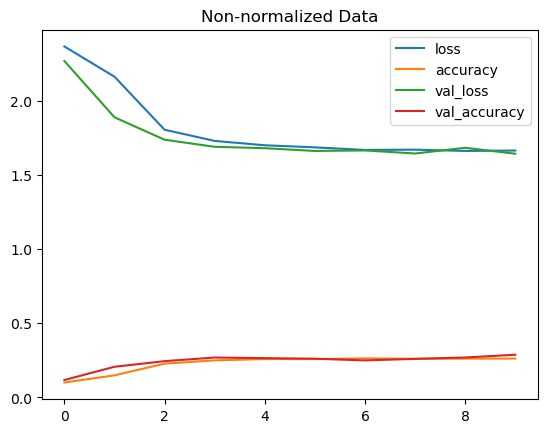

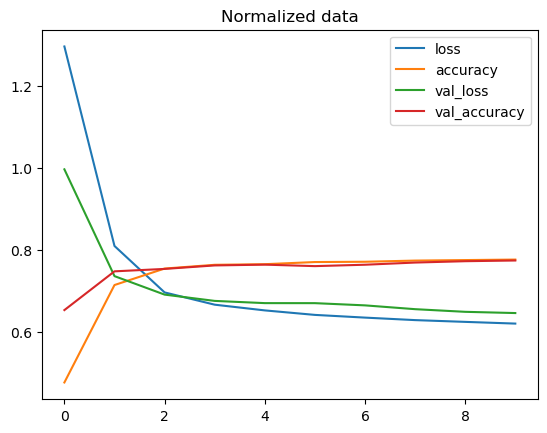

In [14]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(history_1.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(history_2.history).plot(title="Normalized data");

Try to find out the ideal learning rate with `lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))` and train for 40 epochs.

In [15]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_3.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4256 - accuracy: 0.4848 - val_loss: 1.1201 - val_accuracy: 0.6015 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0077 - accuracy: 0.6316 - val_loss: 0.9290 - val_accuracy: 0.6614 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8421 - accuracy: 0.7013 - val_loss: 0.7745 - val_accuracy: 0.7296 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6864 - accuracy: 0.7722 - val_loss: 0.6877 - val_accuracy: 0.7764 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6261 - accuracy: 0.7914 - val_loss: 0.6304 - val_accuracy: 0.7894 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5992 - accuracy: 0.7968 - val_loss: 0.6358 - val_accuracy: 0.7897 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 3s

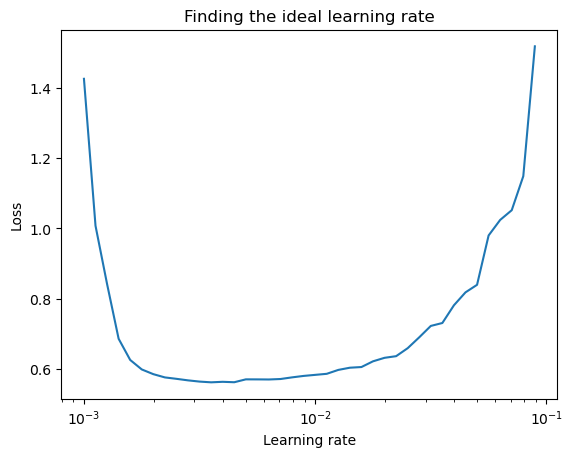

In [16]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

Refit the model using the ideal learning rate and train for 20 epochs.

In [17]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history_4 = model_4.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2507 - accuracy: 0.4947 - val_loss: 0.8581 - val_accuracy: 0.6860
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7283 - accuracy: 0.7416 - val_loss: 0.6860 - val_accuracy: 0.7554
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6372 - accuracy: 0.7697 - val_loss: 0.6433 - val_accuracy: 0.7786
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6077 - accuracy: 0.7867 - val_loss: 0.6241 - val_accuracy: 0.7865
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5909 - accuracy: 0.7956 - val_loss: 0.6215 - val_accuracy: 0.7849
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5771 - accuracy: 0.8009 - val_loss: 0.6056 - val_accuracy: 0.7960
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5675 - accuracy: 0.8044 - val_loss: 0.6059 - val_accuracy:

Make predictions with the most recent model and the test data.

In [18]:
# Make predictions with the most recent model
y_probs = model_4.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 0s 725us/step


array([[6.69220606e-14, 2.13247201e-37, 2.46736621e-16, 6.05273621e-21,
        1.09896590e-18, 3.22070211e-01, 1.71844370e-08, 1.43682733e-01,
        6.50328511e-05, 5.34182012e-01],
       [1.03680352e-02, 3.49910022e-03, 7.79258609e-01, 3.08877695e-03,
        7.33830482e-02, 3.67364637e-03, 1.26053095e-01, 2.51379854e-04,
        4.22698620e-04, 1.67984831e-06],
       [7.95959859e-05, 9.94242370e-01, 2.38429898e-08, 5.67147089e-03,
        6.35254855e-06, 2.21268560e-13, 1.41375892e-07, 1.01600685e-26,
        1.69118192e-12, 3.80468119e-23],
       [1.80333736e-05, 9.97038484e-01, 1.24730670e-09, 2.94233928e-03,
        1.17712864e-06, 5.59693706e-15, 1.23681243e-08, 4.75620550e-30,
        7.02430057e-14, 8.14798652e-26],
       [9.00774524e-02, 7.46683567e-04, 1.96030080e-01, 5.32079786e-02,
        5.98009787e-02, 6.86704600e-03, 5.81019163e-01, 3.73261150e-06,
        1.22454762e-02, 1.36780022e-06]], dtype=float32)

Find the highest values of the prediction.

In [19]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

Create a confusion matrix.

In [20]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[747,  12,  24,  74,   3,   1, 128,   0,  11,   0],
       [  1, 952,  11,  22,   6,   0,   8,   0,   0,   0],
       [ 18,   2, 682,   8, 190,   0,  99,   0,   1,   0],
       [ 38,  29,   8, 790,  56,   2,  74,   0,   3,   0],
       [  0,   2, 115,  19, 794,   0,  66,   0,   4,   0],
       [  2,   0,   0,   0,   0, 889,   5,  61,   4,  39],
       [142,   1, 146,  42, 160,   0, 491,   0,  18,   0],
       [  0,   0,   0,   0,   0,  33,   0, 947,   0,  20],
       [  5,   0,   2,   8,   7,   5,  76,   4, 893,   0],
       [  1,   0,   0,   0,   0,  20,   0,  70,   0, 909]])

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

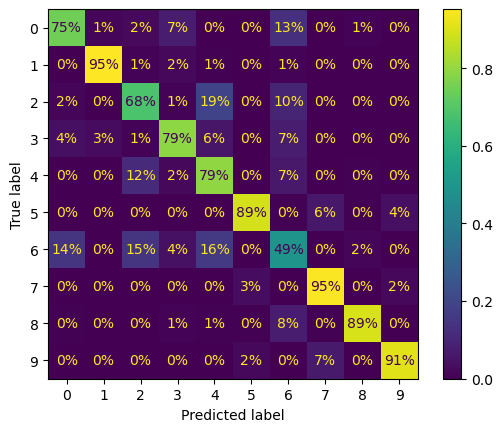

In [22]:
plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(test_labels, y_preds,
                                        normalize="true", values_format=".0%")
plt.show()

Which type of clothing is the least recognized?

In [23]:
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
